# **The Idea of Ensembles**

Let's say you ask a very difficult question to a thousand people chosen randomly and aggregate their answers.

* It turns out that such **an aggregated answer is better / more accurate** than the answer of an expert in this field.

* It's called *'wisdom of the crowd'*

Similarly, if you aggregate the predictions of a group of predictors (classifiers, or regressors), you will often get better predictions than a single predictor.

______

**Terminology**:

A group of predictors combined into a single model is called an **ensemble**, while the technique underlying ensemble construction for machine learning tasks is called **ensemble learning**.

**Predictor** - one algorithm of an ensemble.

___

For example, you can train a group of classifiers consisting of Decision Trees, each of which is trained on random subsets of a training sample.  
And to make a prediction, you just get predictions from each individual decision tree, and then predict the class receiving the most **"votes"**.

Such an ensemble of decision trees is called a **Random Forest**, and despite its simplicity, this algorithm is one of the most powerful and effective machine learning algorithms to this day.

Ensemble methods are often used at the very end of a project, when several strong, but different classifiers have already been built, in order to combine them into a better predictor.

The solutions of the winners in machine learning contests very often include ensemble methods (for the most part - boosting).  

# **Voting Classifiers**

## The Idea of Voting

Let's say we have trained several classifiers, each of which achieves an accuracy of about 80%.  

E.g., these are:
* Logistic Regression
* SVM Classifier
* Random Forest classifier
* K-Nearest Neubors classifier
* ...  
  
That is, we have a group of **strong but different** predictors.



![Training diverse classifiers](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0701.png)

The easiest way to create a better classifier is to **aggregate predictions from each classifier** and predict the class that receives **the most votes**.

This classifier is called **majority-vote classifier** OR **hard voting classifier**:

![Hard voting classifier predictions](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0702.png)

* Surprisingly, the voting classifier often achieves greater accuracy than the best classifier in the ensemble.

But what if instead of **strong learners** we have **weak learners**?  
Let's imagine that the accuracy of each of our predictors is 50-55%, that is, only slightly better than random guessing.  
How will this affect the ensemble?

______


**An important fact**:  

Provided there is **a sufficient variety** of weak predictors in the ensemble, the ensemble as a whole **remains a strong predictor**.  

The most important condition for predictors in an ensemble is their **variety**.

______

## Several weak learners --> Strong learner. Why?


Let's say we have a broken (biased) coin (**51%** chance of heads, **49%** chance of tails).   
  
We are conducting an experiment and want to find out the probability that the number of heads will be more than the number of tails *P(h > t)*.
  
**If you flip a coin 10 times**, the distribution of the toss outcomes will be quite unpredictable. Let's say *P(h > t)* is about **50%**.

**If you flip a coin 1000 times**, you will get about 510 eagle drops (more or less). Now *P(h > t)* will be close to **75%**.  
  
**If you flip a coin 10,000 times**, *P(h > t)* will be close to **97%**.  

This is due to **the law of large numbers**: if you flip a coin, the ratio of the number of "heads" falls gets closer and closer to the probability of an eagle (51%).


The figure shows 2 experiments on a biased coin.  
You can see that as the number of tosses increases, the ratio of the "eagles" becomes equal to 51%.

In [34]:
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [35]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 2) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

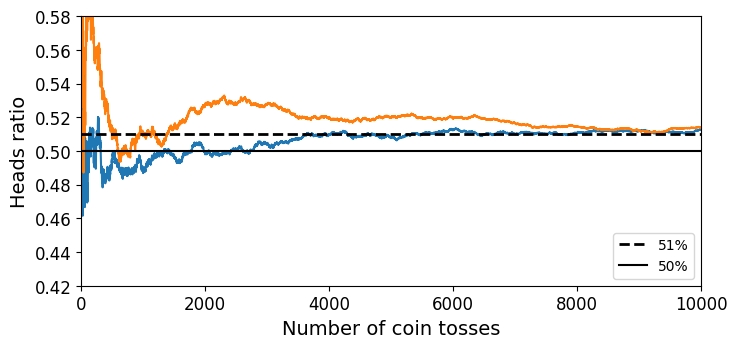

In [36]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

Similarly, if you build an ensemble of 1000 classifiers that independently have an accuracy of 51% (slightly better than random guessing), and if you predict the majority class, you can expect **75% accuracy**!

## The rule of indepencdence

However, not everything is so clear. If we use the same predictor on the same sample for predictions within the ensemble, this predictor will make the same mistakes every time (we will have the most votes for the incorrect class!).
  
That is, in order to expect high accuracy from the ensemble, it is necessary to ensure the **independence** of the classifiers from each other.  
  
One way to ensure such independence is to train different algorithms.

## Example

[Voting classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

Let's look at the code that creates and trains an ensemble of three different classifiers.

First, we'll upload the dataset:  

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [38]:
X_train.shape

(375, 2)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

When you do **hard voting** - you assign the label for the xi object by choosing the most frequent label among the predictors.  
  
Example:  
predictor_1: 1 class  
predictor_2: 1 class  
predictor_3: 0 class  
predictor_4: 0 class  
predictor_5: 1 class  
Output (if all predictors have the same weight): 1 class  

In [46]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svc_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [43]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904


In [47]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.896
VotingClassifier 0.912


As you can see, the classifier based on hard voting slightly surpasses all independent classifiers.  

Another way of label assigning is **soft voting**.

If each of the classifiers can estimate the probabilities of classes (i.e. the predict_proba() method is defined), then you can tell Scikit-learn to predict the class with the highest probability of the class averaged over each of the independent classifiers.

In other words, the answer of the ensemble during soft voting is just the **argmax of the sum of the predicted probabilities**.

$$max (w_1*p_1+w_2*p_1+ .... + w_i*p_1, w_1*p_2+w_2*p_2+ .... +w_i*p_2, ..., w_1*p_i+w_2*p_i+ .... +w_i*p_i) $$  
  
where w1, w2, ..., wi - weights of the predictors (should sum to 1)  
where p1, p2, ..., pi - probabilities of being a class (should sum to 1 within each predictor)   


Example:  
predictor_1: 0.3 (0 class), 0.4 (1 class), 0.3 (2 class)  
predictor_2: 0.4 (0 class), 0.2 (1 class), 0.4 (2 class)  
predictor_3: 0.3 (0 class), 0.4 (1 class), 0.3 (2 class)  
predictor_4: 0.4 (0 class), 0.3 (1 class), 0.3 (2 class)  
predictor_5: 0.3 (0 class), 0.4 (1 class), 0.3 (2 class)   

class 0: (0.3 + 0.4 + 0.3 + 0.4 + 0.3) / 5 = 0.339  
class 1: (0.4 + 0.2 + 0.4 + 0.3 + 0.4) / 5 = 0.34  
class 2: (0.3 + 0.4 + 0.3 + 0.3 + 0.3) / 5 = 0.32  
  
Output (if all the predictors have the same weight):  
$$ max(0.339, 0.34, 0.32) = 0.34$$  
so we choose 1 class for this object.

Soft voting often shows better performance compared to hard voting.  

To activate it, you just need to replace voting="hard" with voting="soft" and make sure that all classifiers are able to estimate the probabilities of classes.  



In [ ]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42) # SVM magic

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft', n_jobs=3)
voting_clf.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 n_jobs=3, voting='soft')

In [ ]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42) # SVM magic

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft', n_jobs=1)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 n_jobs=1, voting='soft')

In [51]:
for clf in (log_clf, rnd_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


To control the weights of the predictors, the VotingClassifier has a weights parameter.  
E.g. let's say we trust Random Forest more...

In [62]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42) # SVM magic

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft',
    weights=np.array([0.3, 0.4, 0.3]))
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft', weights=array([0.3, 0.4, 0.3]))

In [63]:
for clf in (log_clf, rnd_clf, svc_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


# **Bagging and Pasting**

As it has been stated, in order to make the classifiers less correlated, you can simply use different models within the ensemble.  
  
**Another approach** is to use the same algorithm for each predictor, but train it on **different random subsets of the training sample**.  

**Bagging (bootstrap aggregating)** consists in using the same algorithm within an ensemble (e.g. DT) trained on subsets of a training sample formed using the bootstrap method.  
  
**Bootstrap** - random sampling from X with replacement. The sample size can correspond to the X size.    
Example: X = {x1, x2, x3, x4} , Xi = {x3, x1, x2, x1} or Xi = {x3, x2, x2}

**Pasting** consists in using the same algorithm within an ensemble trained on subsamples of a training sample.  
  
**Subsampling** creates samples without replacement. The sample size is smaller than the X size.  
Example: X = {x1, x2, x3, x4} , X1 = {x3, x1}, X2 = {x3, x2}, X3 = {x4, x1}.  

In other words, both bagging and pasting allow training sample objects to be repeatedly selected for multiple predictors. But only bagging allows training sample objects to be selected multiple times for the same predictor.  

The process is illustrated on the image below:

![|50%](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0704.png)

When predicting, the same methods as for the voting classifier are used: 1) hard voting (aggregate predictions and choose a mode, for classification, or mean value, for regression); 2) soft voting (argmax of the sum of the predicted probabilities)  

Compared to training on an entire sample, each independent predictor certainly has a larger bias.  

Using subsets allows you to add variety to predictors. They will make different mistakes and learn different patterns from the data.  

Aggregation of the predictions of such predictors makes it possible to reduce both the bias and variance. More often, however, the ensemble will have a **similar bias and a smaller variance** compared to one model trained on whole X.   
  
Patterns that do not exist in the general population will not be captured by the ensemble, because they will not occur often.  
  
That is, ensemble use increases the generalizing ability of models.    


# Bagging and Pasting in Scikit-Learn

[Bagging classifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

Scikit-learn provides a fairly simple interface for both bagging and pasting using the ```BaggingClassifier``` class (or ```BaggingRegressor``` for regression tasks).

Consider training an ensemble of 500 regression trees, each of which is trained on 100 randomly selected training sample objects, sampling is performed with replacement (in the case of bagging; if you want to use pasting, just set the parameter ``bootstrap=False``).   
  
``n_estimators`` defines the number of predictors in an ensemble.  
``max_samples`` parameter allows us to controll the size of the bootstraped samples.

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

``BaggingClassifier`` **automatically performs soft voting** instead of hard voting, if the base classifier can estimate the probabilities of classes (i.e., if the method `predict_proba()` is implemented), which is our case.

Error on test:  

In [65]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.92


In [15]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


Error on train:  

In [16]:
bag_y_train = bag_clf.predict(X_train)
dt_y_train = tree_clf.predict(X_train)
print(accuracy_score(y_train, bag_y_train))
print(accuracy_score(y_train, dt_y_train))

0.9386666666666666
1.0


Let's compare the decisive boundaries of one decision tree and the decisive boundary obtained through an ensemble of 500 trees trained on the *moons* dataset.  

In [66]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

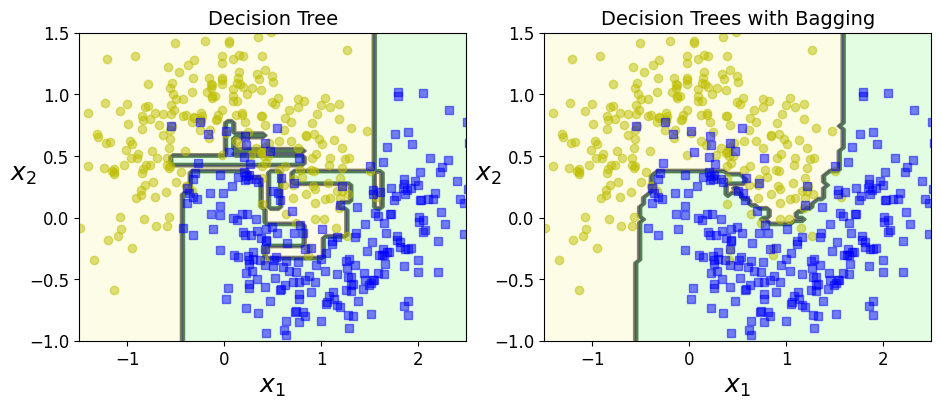

In [67]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

As you can see, ensemble carries out better generalization than a decision tree: the ensemble has a larger bias, but less variance (roughly speaking, it makes slightly more mistakes on the training sample, but the decisive boundary is more "smooth").  

Bootstrapping introduces a little more diversity into the subsets on which each predictor is trained, so bagging eventually has a larger bias compared to pasting, but it also means that the predictors will eventually be less correlated, and therefore the variance of the ensemble decreases.

Finally, the results of bagging more often lead to better models, which explains why it is preferable. However, if you have the time and computing resources, you can use **cross-validation** to evaluate both bagging and pasting and choose the appropriate method.

## Out-of-Bag Evaluation


When using bagging, some objects may be selected multiple times for each predictor, while others may never be selected.

By default, ```BaggingClassifier``` selects $m$ objects from the training sample with replacement (```bootstrap = True```), where $m$ is the size of the training sample.

This means that only **~63%** of the objects in the training sample will be used for each predictor. The remaining **37%** of the training sample objects that were not selected are called **out-of-bag (oob) instances**. Note that these are not the same 37% for all predictors.

Since the predictor has never seen oob objects during training, they can be used for **evaluation**, without the need for separation into a validation/training sample or cross-validation. You can estimate the ensemble simply by averaging the oob scores for each predictor.  

In Scikit-learn, you can set the ```oob_score=True``` parameter, when creating a ```BaggingClassifier``` to request an automatic oob evaluation after training.
Look at the code that demonstrates this procedure:

In [68]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

According to this oob estimate, the BaggingClassifier can achieve an accuracy of about 0.899% on a test sample.  
Let's check this:  

In [69]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

So, we got 91.2% accuracy on the test sample - a fairly accurate estimate!

An **oob solving function** is also available for each training object, via the ```oob_decision_function_``` attribute.   
In our case (since the base estimator has the ```predict_proba()``` method), the decision boundary function will return the probabilities of classes for each object of the sample.  

In [21]:
bag_clf.oob_decision_function_[0:7]

array([[0.32275132, 0.67724868],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09497207, 0.90502793],
       [0.31147541, 0.68852459]])

Note that probability estimate is calculated via oob objects: it represents the averaged probabilities returned by the ```predict_proba()``` method for oob objects.  
  
Thus, if n_estimators is small it might be possible that a data point was never left out during the bootstrap (because initially, the probability of getting into the training subsample for any object is greater than the probability of not getting in it). In this case, oob_decision_function_ might contain NaN.

In [70]:
bag_clf1 = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=3,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf1.fit(X_train, y_train);

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:865: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:871: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


The algorithm looks at which trees the given object was left out, and averages the probability estimates among these trees:  

In [71]:
bag_clf1.oob_decision_function_[0:7]

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [       nan,        nan],
       [       nan,        nan],
       [0.        , 1.        ],
       [0.        , 1.        ]])

The algorithm passes all objects through all the trees and averages the probability estimate:

In [72]:
bag_clf1.predict_proba(X_train)[0:7]

array([[0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [73]:
y_pred1 = bag_clf1.predict(X_test)
accuracy_score(y_test, y_pred1)

0.864

# Random Patches and Random Subspaces

The ```BaggingClassifier``` class also supports attribute selection. This is another way to add variety to predictors. Attributes selection is regulated by two hyperparameters of the algorithm: ```max_features``` (the number of features to draw from X to train each estimator) and ```bootstrap_features``` (whether features are drawn with replacement).   
They work in the same way as ```max_samples``` and ```bootstrap```, but are designed to be sample the attributes. Therefore, each predictor will learn from a random subset of the input attributes.

This is especially effective when you are dealing with high-dimensional spaces (for example, images).

 Sampling of both objects and attributes is called the **Random Patches method (метод случайных путей)**.

Keeping all the objects of the training sample (i.e. ``bootstrap=False`` and ``max_samples=1.0``), but sampling the attributes (i.e. ``bootstrap_features=True`` and/or ``max_features`` < 1.0) is called **the Random Subspaces method (метод случайнх подпространств)**.

Sampling features results in even more predictor diversity, trading a bit more bias for a lower variance.

# Random Forests

[Documentation on RF](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

```Random Forest``` is an ensemble of decision trees trained using the bagging (or sometimes pasting) method, usually with the ```max_samples``` parameter equal to the size of the training sample.

Instead of building a ```BaggingClassifier``` and passing the Decision Tree Classifier to it, you can use ```RandomForestClassifier```, which is much more convenient and optimized for decision trees.

Consider the code that trains a Random Forest with 500 trees (each of which contains a maximum of 16 leaves)

In [74]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=20)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf))

0.92


With a few exceptions, ```RandomForestClassifier``` has all the hyperparameters of the ```DecisionTreeClassifier``` (in order to control the process of tree growth), as well as all the hyperparameters of the ```BaggingClassifier``` to control the ensemble.

The Random Forest algorithm introduces additional randomness when growing trees, instead of looking for the best attributes when splitting a node, it looks for the best attribute among a **random subset** of them.  
By default, the number of random features is taken equal to the squared root of n_features.

This leads to more diversity in the decision trees, which leads to more bias in favor of less variance, which generally results in a better model.  

The next ```BaggingClassifier``` is close to the previous ```RandomForestClassifier```:

In [75]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="best", max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=20)

In [76]:
bag_clf.fit(X_train, y_train)

y_pred_rf = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf))

0.92


Note that when ```bootstrap=False```, the entire training sample is used to train each tree (and the  ```max_samples ``` parameter becomes unavailable).
Randomness then is supported only at the feature level (Random Subspaces method)

# Extra-Trees

* When you grow a tree in a Random Forest, each node considers only a limited random subset of the attribute for splitting. It is possible to make the trees even more random by using **random thresholds for each attribute**, instead of searching for the best possible thresholds (as in conventional decision trees).

* A forest of such extremely random trees is called **Extremely Randomized Trees** ensemble (or **Extra-Trees**). And again, this leads to a larger bias in favour of a lower variance. This also makes Extra-Trees much **faster to train** than regular Random Forests, since finding the best possible threshold value for each attribute in each node is a very time-consuming task when growing a tree.  

* You can use the Extra-Trees classifier using the `ExtraTreesClassifier` class in Scikit-Learn. Its API is identical to the `RandomForestClassifier` class. There is also a similar class used for regression ``ExtraTreesRegressor`` with the same API as in the class ``RandomForestRegressor``.

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=20)
ext_clf.fit(X_train, y_train)

y_pred_rf = ext_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf))

0.912


It is difficult to give any advice whether ```RandomForestClassifier``` will work better or worse than ```ExtraTreesClassifier```. In general, there is only one way to find it out - try both methods and compare them by performing cross-validation (and configuring hyperparameters using grid search).

# Feature Importance

Since a Random Forest is based on decision trees, its advantage is the ability to evaluate **feature importance**.  
Scikit-Learn measures the importance of features by searching how often nodes in trees use this attribute to reduce the inhomogeneity (impurity) on average (for all trees in the forest).  
That is, the importance of features within each tree is considered, and then the values are averaged throughout the forest.   
Moreover, such an evaluation is much more stable than evaluating the importance of an attribute on a single tree (because, as we know, trees can seriously change their structure depending on the training data).   
You can access the result using the variable ``feature_importances_``.

For example, a section of the code below trains a RandomForestClassifier on a dataset of Iris flowers and outputs the "importance" of each feature.

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09223360024487964
sepal width (cm) 0.023161186363775215
petal length (cm) 0.442311234020509
petal width (cm) 0.4422939793708362


It seems that the most important attributes are petal length (~ 45.5%) and width (~ 41.6%), while sepal length and width are less important (~ 10% and ~ 3%, respectively).

Similarly, if you train Random Forest on the MNIST dataset and plot the importance of each pixel, you will get the following image:

In [30]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [31]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X, y)

RandomForestClassifier(random_state=42)

In [32]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation="nearest")
    plt.axis("off")

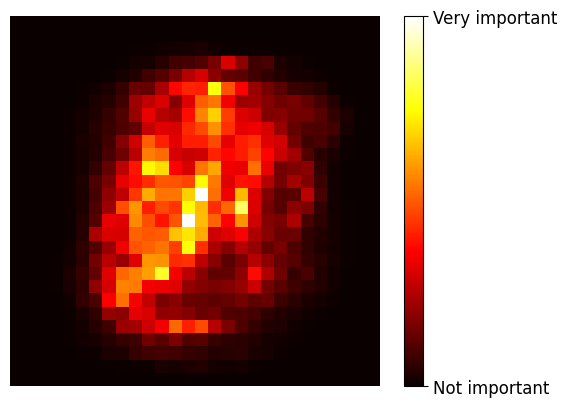

In [33]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

Random Forests are very convenient to get a quick understanding of which attributes are really important, in particular if you want to make a feature selection.

